In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/crime_and_incarceration_by_state.csv')
df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


In [3]:
# Reading in and cleaning data set indicating poverty rate per year in the US
df_poverty_rate = pd.read_csv('../datasets/poverty_rate_per_year.csv')

df_poverty_rate.rename(columns = {'DATE' : 'Year', 'PPAAUS00000A156NCEN' : 'Poverty_rate'}, inplace = True)
df_poverty_rate = df_poverty_rate.drop(labels = range(0, 12), axis = 0)
df_poverty_rate = df_poverty_rate.drop(labels = range(28, 31), axis = 0)
df_poverty_rate = df_poverty_rate.reset_index(drop = True)
df_poverty_rate['Year'] = df_poverty_rate['Year'].astype(str)
df_poverty_rate['Year'] = df_poverty_rate['Year'].str.slice(0, 4, 1)
df_poverty_rate['Year'] = df_poverty_rate['Year'].astype(int)

df_poverty_rate

,Year,Poverty_rate
0,2001,11.7
1,2002,12.1
2,2003,12.5
3,2004,12.7
4,2005,13.3
5,2006,13.3
6,2007,13.0
7,2008,13.2
8,2009,14.3
9,2010,15.3


In [4]:
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


Creating a 'poverty_rate' column in the original data frame, and assigning the poverty rate for each year to it's respective value.

Note: It was difficult to find a dataset with the poverty rate for each state per year. We decided that the US poverty rate for the year would still be a good indication of the value for each state. (For a respective year, all states have the same poverty rate.)

In [5]:
df["poverty_rate"] = ""

df.loc[df['year'] == 2001, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][0]
df.loc[df['year'] == 2002, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][1]
df.loc[df['year'] == 2003, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][2]
df.loc[df['year'] == 2004, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][3]
df.loc[df['year'] == 2005, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][4]
df.loc[df['year'] == 2006, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][5]
df.loc[df['year'] == 2007, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][6]
df.loc[df['year'] == 2008, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][7]
df.loc[df['year'] == 2009, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][8]
df.loc[df['year'] == 2010, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][9]
df.loc[df['year'] == 2011, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][10]
df.loc[df['year'] == 2012, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][11]
df.loc[df['year'] == 2013, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][12]
df.loc[df['year'] == 2014, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][13]
df.loc[df['year'] == 2015, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][14]
df.loc[df['year'] == 2016, ['poverty_rate']] = df_poverty_rate['Poverty_rate'][15]



In [6]:
df['poverty_rate'] = df['poverty_rate'].astype(float)

In [7]:
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            816 non-null    object 
 1   includes_jails          816 non-null    bool   
 2   year                    816 non-null    int64  
 3   prisoner_count          816 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  rape_revised            199 non-null    float64
 11  robbery                 799 non-null    float64
 12  agg_assault             799 non-null    float64
 13  property_crime_total    799 non-null    float64
 14  burglary                799 non-null    fl

Only 199/816 rows for rape_revised are non-null. So, we will remove it.

In [9]:
df.drop(columns=['rape_revised'], inplace=True)
df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0,14.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0,14.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,720.0,5144.0,37282.0,9127.0,25657.0,2498.0,14.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0,14.0


In [10]:
df[df['jurisdiction'] == 'FEDERAL']

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7
51,FEDERAL,False,2002,158216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1
102,FEDERAL,False,2003,168144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5
153,FEDERAL,False,2004,177600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7
204,FEDERAL,False,2005,186364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3
255,FEDERAL,False,2006,190844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3
306,FEDERAL,False,2007,197285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
357,FEDERAL,False,2008,198414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.2
408,FEDERAL,False,2009,205087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3
459,FEDERAL,False,2010,206968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3


Rows with FEDERAL jurisdiction are missing a lot of data, and we mostly care about states. So, we remove those rows.

In [11]:
federal_rows = df[df['jurisdiction'] == 'FEDERAL']
df.drop(federal_rows.index, inplace=True)
df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0,14.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0,14.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,720.0,5144.0,37282.0,9127.0,25657.0,2498.0,14.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0,14.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 815
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            800 non-null    object 
 1   includes_jails          800 non-null    bool   
 2   year                    800 non-null    int64  
 3   prisoner_count          800 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  robbery                 799 non-null    float64
 11  agg_assault             799 non-null    float64
 12  property_crime_total    799 non-null    float64
 13  burglary                799 non-null    float64
 14  larceny                 799 non-null    fl

In [13]:
# based on the above summary, one row is missing data
# here is an attempt to find it
df[df['crime_reporting_change'].isna()]

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
746,NEW YORK,False,2015,51485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7


In [14]:
df[df['jurisdiction'] == 'NEW YORK']

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
32,NEW YORK,False,2001,67554,False,False,19084350.0,98022.0,960.0,3546.0,36555.0,56961.0,458003.0,80400.0,329316.0,48287.0,11.7
83,NEW YORK,False,2002,66925,False,False,19134293.0,95030.0,909.0,3885.0,36653.0,53583.0,442091.0,76700.0,318025.0,47366.0,12.1
134,NEW YORK,False,2003,65388,False,False,19212425.0,89486.0,934.0,3775.0,35790.0,48987.0,432079.0,75453.0,311422.0,45204.0,12.5
185,NEW YORK,False,2004,64024,False,False,19280727.0,84914.0,889.0,3608.0,33506.0,46911.0,422734.0,70696.0,311036.0,41002.0,12.7
236,NEW YORK,False,2005,63032,False,False,19315721.0,85839.0,874.0,3636.0,35179.0,46150.0,405990.0,68034.0,302220.0,35736.0,13.3
287,NEW YORK,False,2006,63538,False,False,19306183.0,84016.0,922.0,3168.0,34459.0,45467.0,398577.0,68617.0,297827.0,32133.0,13.3
338,NEW YORK,False,2007,62738,False,False,19297729.0,79962.0,805.0,2928.0,31085.0,45144.0,383624.0,64914.0,290681.0,28029.0,13.0
389,NEW YORK,False,2008,60198,False,False,19490297.0,77546.0,836.0,2798.0,31787.0,42125.0,388599.0,65544.0,297962.0,25093.0,13.2
440,NEW YORK,False,2009,58479,False,False,19541453.0,75110.0,781.0,2582.0,28141.0,43606.0,377537.0,62769.0,292897.0,21871.0,14.3
491,NEW YORK,False,2010,56420,False,False,19395206.0,76492.0,868.0,2797.0,28630.0,44197.0,379710.0,65839.0,293232.0,20639.0,15.3


In [15]:
# removing row, but should it be removed?
df.drop(746, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1 to 815
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            799 non-null    object 
 1   includes_jails          799 non-null    bool   
 2   year                    799 non-null    int64  
 3   prisoner_count          799 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  robbery                 799 non-null    float64
 11  agg_assault             799 non-null    float64
 12  property_crime_total    799 non-null    float64
 13  burglary                799 non-null    float64
 14  larceny                 799 non-null    fl

In [17]:
df[df['rape_legacy'].isna()]

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
766,ALABAMA,False,2016,23745,False,False,4860545.0,25878.0,407.0,NaN,4687.0,18869.0,143259.0,34045.0,97498.0,11716.0,14.0
767,ALASKA,True,2016,4378,False,False,741522.0,5966.0,52.0,NaN,850.0,4011.0,24876.0,4053.0,17766.0,3057.0,14.0
768,ARIZONA,False,2016,42248,False,False,6908642.0,32542.0,389.0,NaN,7045.0,21804.0,207317.0,38216.0,150618.0,18483.0,14.0
769,ARKANSAS,False,2016,15833,False,False,2988231.0,16563.0,217.0,NaN,2125.0,12007.0,98092.0,23814.0,67091.0,7187.0,14.0
770,CALIFORNIA,False,2016,129416,False,False,39296476.0,174796.0,1930.0,NaN,54789.0,104375.0,1002070.0,188304.0,637010.0,176756.0,14.0
771,COLORADO,False,2016,19486,False,False,5530105.0,19030.0,189.0,NaN,3525.0,11681.0,152146.0,23825.0,108680.0,19641.0,14.0
772,CONNECTICUT,True,2016,15040,False,False,3587685.0,8169.0,79.0,NaN,2711.0,4588.0,64875.0,10107.0,47642.0,7126.0,14.0
773,DELAWARE,True,2016,6334,False,False,952698.0,4859.0,58.0,NaN,1359.0,3131.0,26370.0,5028.0,19812.0,1530.0,14.0
774,FLORIDA,False,2016,98010,False,False,20656589.0,88700.0,1111.0,NaN,20175.0,59816.0,553812.0,100325.0,410352.0,43135.0,14.0
775,GEORGIA,False,2016,53433,False,False,10313620.0,40268.0,682.0,NaN,12114.0,24091.0,307305.0,62715.0,218127.0,26463.0,14.0


All remaining rows have all the data except for 50 which are missing rape_legacy. All of these rows are from 2016. So, it seems relatively safe to remove these rows and restrict the model to years 2001-2015 for simplicity.

In [18]:
df.drop(df[df['rape_legacy'].isna()].index, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 764
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            749 non-null    object 
 1   includes_jails          749 non-null    bool   
 2   year                    749 non-null    int64  
 3   prisoner_count          749 non-null    int64  
 4   crime_reporting_change  749 non-null    object 
 5   crimes_estimated        749 non-null    object 
 6   state_population        749 non-null    float64
 7   violent_crime_total     749 non-null    float64
 8   murder_manslaughter     749 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  robbery                 749 non-null    float64
 11  agg_assault             749 non-null    float64
 12  property_crime_total    749 non-null    float64
 13  burglary                749 non-null    float64
 14  larceny                 749 non-null    fl

In [20]:
df_copy = df.copy() # copy of the data frame before any encoding/normalization
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7


Change numerical columns to be a percentage of the population.

In [21]:
numerical_columns = ['prisoner_count', 'violent_crime_total', 'murder_manslaughter', 'rape_legacy', 'robbery', 'agg_assault', 'property_crime_total', 'burglary', 'larceny', 'vehicle_theft', 'poverty_rate']
for column in numerical_columns:
    df[column] /= df['state_population']

In [22]:
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,False,2001,0.005536,False,False,4468912.0,0.004382,0.000085,0.000306,0.001250,0.002741,0.038768,0.009094,0.026850,0.002824,2.618087e-06
2,ALASKA,True,2001,0.007212,False,False,633630.0,0.005895,0.000062,0.000791,0.000811,0.004231,0.036551,0.006071,0.026348,0.004132,1.846503e-05
3,ARIZONA,False,2001,0.005221,False,False,5306966.0,0.005403,0.000075,0.000286,0.001671,0.003371,0.055375,0.010330,0.035208,0.009837,2.204650e-06
4,ARKANSAS,False,2001,0.004264,False,False,2694698.0,0.004524,0.000055,0.000331,0.000809,0.003328,0.036778,0.008237,0.025825,0.002716,4.341859e-06
5,CALIFORNIA,False,2001,0.004542,False,False,34600463.0,0.006152,0.000064,0.000288,0.001867,0.003933,0.032780,0.006713,0.020166,0.005901,3.381458e-07


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 764
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            749 non-null    object 
 1   includes_jails          749 non-null    bool   
 2   year                    749 non-null    int64  
 3   prisoner_count          749 non-null    float64
 4   crime_reporting_change  749 non-null    object 
 5   crimes_estimated        749 non-null    object 
 6   state_population        749 non-null    float64
 7   violent_crime_total     749 non-null    float64
 8   murder_manslaughter     749 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  robbery                 749 non-null    float64
 11  agg_assault             749 non-null    float64
 12  property_crime_total    749 non-null    float64
 13  burglary                749 non-null    float64
 14  larceny                 749 non-null    fl

Normalize numerical columns.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,False,2001,0.578197,False,False,4468912.0,0.483503,0.558645,0.250677,0.429381,0.396178,0.555958,0.663460,0.556467,0.233407,0.082348
2,ALASKA,True,2001,0.806176,False,False,633630.0,0.686714,0.389731,0.829605,0.270146,0.651147,0.506057,0.357195,0.539229,0.353633,0.654717
3,ARIZONA,False,2001,0.535379,False,False,5306966.0,0.620714,0.490118,0.226413,0.582502,0.503930,0.929712,0.788642,0.843350,0.877999,0.067415
4,ARKANSAS,False,2001,0.405096,False,False,2694698.0,0.502561,0.341598,0.280179,0.269480,0.496664,0.511163,0.576589,0.521264,0.223546,0.144608
5,CALIFORNIA,False,2001,0.442915,False,False,34600463.0,0.721309,0.405754,0.228587,0.653859,0.600140,0.421170,0.422200,0.327017,0.516252,0.000000


Encode binary features.

In [25]:
df['includes_jails'] = df['includes_jails'].apply(lambda x: 1 if x else 0)
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,0,2001,0.578197,False,False,4468912.0,0.483503,0.558645,0.250677,0.429381,0.396178,0.555958,0.663460,0.556467,0.233407,0.082348
2,ALASKA,1,2001,0.806176,False,False,633630.0,0.686714,0.389731,0.829605,0.270146,0.651147,0.506057,0.357195,0.539229,0.353633,0.654717
3,ARIZONA,0,2001,0.535379,False,False,5306966.0,0.620714,0.490118,0.226413,0.582502,0.503930,0.929712,0.788642,0.843350,0.877999,0.067415
4,ARKANSAS,0,2001,0.405096,False,False,2694698.0,0.502561,0.341598,0.280179,0.269480,0.496664,0.511163,0.576589,0.521264,0.223546,0.144608
5,CALIFORNIA,0,2001,0.442915,False,False,34600463.0,0.721309,0.405754,0.228587,0.653859,0.600140,0.421170,0.422200,0.327017,0.516252,0.000000


In [26]:
df['crime_reporting_change'] = df['crime_reporting_change'].apply(lambda x: 1 if x == 'True' else 0)
df['crimes_estimated'] = df['crimes_estimated'].apply(lambda x: 1 if x == 'True' else 0)
df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,ALABAMA,0,2001,0.578197,0,0,4468912.0,0.483503,0.558645,0.250677,0.429381,0.396178,0.555958,0.663460,0.556467,0.233407,0.082348
2,ALASKA,1,2001,0.806176,0,0,633630.0,0.686714,0.389731,0.829605,0.270146,0.651147,0.506057,0.357195,0.539229,0.353633,0.654717
3,ARIZONA,0,2001,0.535379,0,0,5306966.0,0.620714,0.490118,0.226413,0.582502,0.503930,0.929712,0.788642,0.843350,0.877999,0.067415
4,ARKANSAS,0,2001,0.405096,0,0,2694698.0,0.502561,0.341598,0.280179,0.269480,0.496664,0.511163,0.576589,0.521264,0.223546,0.144608
5,CALIFORNIA,0,2001,0.442915,0,0,34600463.0,0.721309,0.405754,0.228587,0.653859,0.600140,0.421170,0.422200,0.327017,0.516252,0.000000


In [27]:
# one hot encode jurisdiction
df = pd.get_dummies(df, columns=['jurisdiction'])
df.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,...,jurisdiction_SOUTH DAKOTA,jurisdiction_TENNESSEE,jurisdiction_TEXAS,jurisdiction_UTAH,jurisdiction_VERMONT,jurisdiction_VIRGINIA,jurisdiction_WASHINGTON,jurisdiction_WEST VIRGINIA,jurisdiction_WISCONSIN,jurisdiction_WYOMING
1,0,2001,0.578197,0,0,4468912.0,0.483503,0.558645,0.250677,0.429381,...,0,0,0,0,0,0,0,0,0,0
2,1,2001,0.806176,0,0,633630.0,0.686714,0.389731,0.829605,0.270146,...,0,0,0,0,0,0,0,0,0,0
3,0,2001,0.535379,0,0,5306966.0,0.620714,0.490118,0.226413,0.582502,...,0,0,0,0,0,0,0,0,0,0
4,0,2001,0.405096,0,0,2694698.0,0.502561,0.341598,0.280179,0.269480,...,0,0,0,0,0,0,0,0,0,0
5,0,2001,0.442915,0,0,34600463.0,0.721309,0.405754,0.228587,0.653859,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# min-max scale population
df['state_population'] = scaler.fit_transform(df[['state_population']])
df.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,...,jurisdiction_SOUTH DAKOTA,jurisdiction_TENNESSEE,jurisdiction_TEXAS,jurisdiction_UTAH,jurisdiction_VERMONT,jurisdiction_VIRGINIA,jurisdiction_WASHINGTON,jurisdiction_WEST VIRGINIA,jurisdiction_WISCONSIN,jurisdiction_WYOMING
1,0,2001,0.578197,0,0,0.102847,0.483503,0.558645,0.250677,0.429381,...,0,0,0,0,0,0,0,0,0,0
2,1,2001,0.806176,0,0,0.003619,0.686714,0.389731,0.829605,0.270146,...,0,0,0,0,0,0,0,0,0,0
3,0,2001,0.535379,0,0,0.124530,0.620714,0.490118,0.226413,0.582502,...,0,0,0,0,0,0,0,0,0,0
4,0,2001,0.405096,0,0,0.056944,0.502561,0.341598,0.280179,0.269480,...,0,0,0,0,0,0,0,0,0,0
5,0,2001,0.442915,0,0,0.882426,0.721309,0.405754,0.228587,0.653859,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# min-max scale year
df['year'] = scaler.fit_transform(df[['year']])
df.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,...,jurisdiction_SOUTH DAKOTA,jurisdiction_TENNESSEE,jurisdiction_TEXAS,jurisdiction_UTAH,jurisdiction_VERMONT,jurisdiction_VIRGINIA,jurisdiction_WASHINGTON,jurisdiction_WEST VIRGINIA,jurisdiction_WISCONSIN,jurisdiction_WYOMING
1,0,0.0,0.578197,0,0,0.102847,0.483503,0.558645,0.250677,0.429381,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.806176,0,0,0.003619,0.686714,0.389731,0.829605,0.270146,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.535379,0,0,0.124530,0.620714,0.490118,0.226413,0.582502,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.405096,0,0,0.056944,0.502561,0.341598,0.280179,0.269480,...,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0.442915,0,0,0.882426,0.721309,0.405754,0.228587,0.653859,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 764
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   includes_jails               749 non-null    int64  
 1   year                         749 non-null    float64
 2   prisoner_count               749 non-null    float64
 3   crime_reporting_change       749 non-null    int64  
 4   crimes_estimated             749 non-null    int64  
 5   state_population             749 non-null    float64
 6   violent_crime_total          749 non-null    float64
 7   murder_manslaughter          749 non-null    float64
 8   rape_legacy                  749 non-null    float64
 9   robbery                      749 non-null    float64
 10  agg_assault                  749 non-null    float64
 11  property_crime_total         749 non-null    float64
 12  burglary                     749 non-null    float64
 13  larceny             

In [31]:
numerical_features = df.select_dtypes(['int64', 'float64'])
numerical_features

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
1,0,0.0,0.578197,0,0,0.102847,0.483503,0.558645,0.250677,0.429381,0.396178,0.555958,0.663460,0.556467,0.233407,0.082348
2,1,0.0,0.806176,0,0,0.003619,0.686714,0.389731,0.829605,0.270146,0.651147,0.506057,0.357195,0.539229,0.353633,0.654717
3,0,0.0,0.535379,0,0,0.124530,0.620714,0.490118,0.226413,0.582502,0.503930,0.929712,0.788642,0.843350,0.877999,0.067415
4,0,0.0,0.405096,0,0,0.056944,0.502561,0.341598,0.280179,0.269480,0.496664,0.511163,0.576589,0.521264,0.223546,0.144608
5,0,0.0,0.442915,0,0,0.882426,0.721309,0.405754,0.228587,0.653859,0.600140,0.421170,0.422200,0.327017,0.516252,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0,1.0,0.318920,0,0,0.204114,0.157673,0.274528,0.097394,0.167905,0.115626,0.103507,0.000000,0.154930,0.062798,0.051122
761,0,1.0,0.151879,0,0,0.172740,0.276956,0.156431,0.250084,0.251523,0.214184,0.463003,0.462587,0.451069,0.318265,0.061834
762,0,1.0,0.262194,0,0,0.034938,0.348772,0.218393,0.156741,0.125166,0.365924,0.138045,0.245872,0.115839,0.085462,0.275697
763,0,1.0,0.365211,0,0,0.136544,0.305634,0.244730,0.138014,0.304785,0.235324,0.127689,0.085354,0.130770,0.148813,0.079783


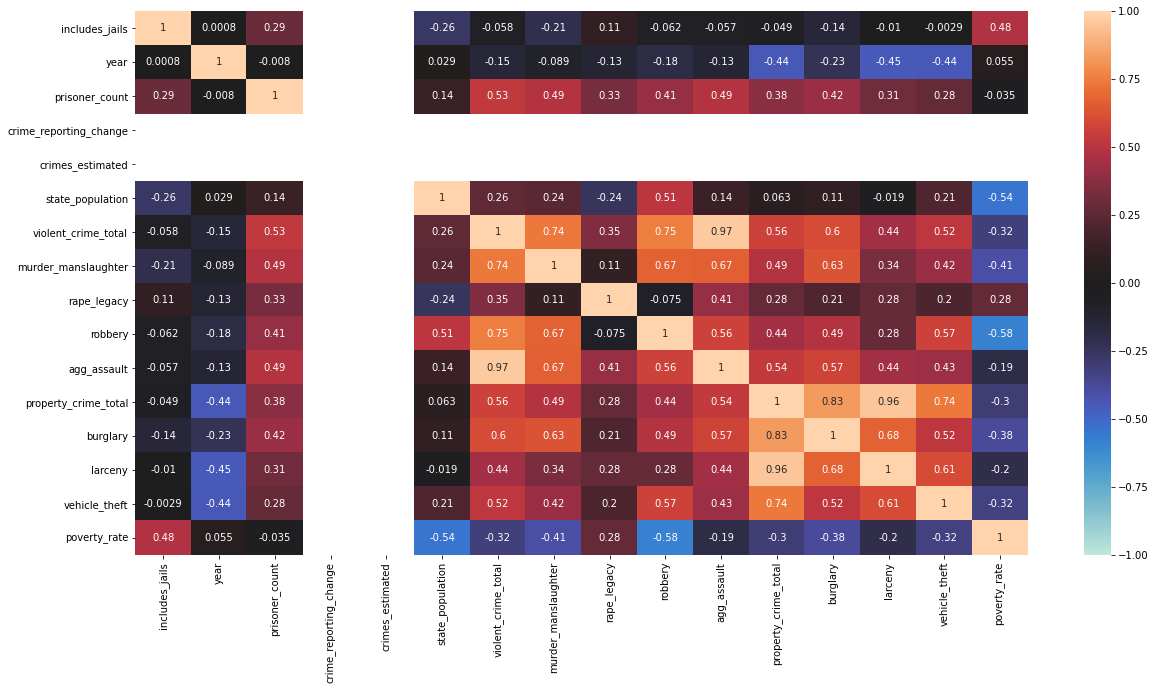

In [32]:
import seaborn as sns
g = sns.heatmap(numerical_features.corr(),annot=True,vmin=-1, vmax=1,center=0)
g.figure.set_size_inches(20,10)

correlated features:
agg_assault and violent_crime_total

aggravated assault is an attempt to cause bodily harm to an individual

larceny and property_crime_total

larceny is the theft of personal property

In [33]:
# remove correlated features
df.drop(columns=['violent_crime_total', 'property_crime_total'], inplace=True)
df.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,murder_manslaughter,rape_legacy,robbery,agg_assault,...,jurisdiction_SOUTH DAKOTA,jurisdiction_TENNESSEE,jurisdiction_TEXAS,jurisdiction_UTAH,jurisdiction_VERMONT,jurisdiction_VIRGINIA,jurisdiction_WASHINGTON,jurisdiction_WEST VIRGINIA,jurisdiction_WISCONSIN,jurisdiction_WYOMING
1,0,0.0,0.578197,0,0,0.102847,0.558645,0.250677,0.429381,0.396178,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.806176,0,0,0.003619,0.389731,0.829605,0.270146,0.651147,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.535379,0,0,0.124530,0.490118,0.226413,0.582502,0.503930,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.405096,0,0,0.056944,0.341598,0.280179,0.269480,0.496664,...,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0.442915,0,0,0.882426,0.405754,0.228587,0.653859,0.600140,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.to_csv('../processed_datasets/crime_and_incarceration_by_state.csv', index=False)

In [35]:
df2 = pd.read_csv('../processed_datasets/crime_and_incarceration_by_state.csv')
df2.head()

,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,murder_manslaughter,rape_legacy,robbery,agg_assault,...,jurisdiction_SOUTH DAKOTA,jurisdiction_TENNESSEE,jurisdiction_TEXAS,jurisdiction_UTAH,jurisdiction_VERMONT,jurisdiction_VIRGINIA,jurisdiction_WASHINGTON,jurisdiction_WEST VIRGINIA,jurisdiction_WISCONSIN,jurisdiction_WYOMING
0,0,0.0,0.578197,0,0,0.102847,0.558645,0.250677,0.429381,0.396178,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.806176,0,0,0.003619,0.389731,0.829605,0.270146,0.651147,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0.535379,0,0,0.124530,0.490118,0.226413,0.582502,0.503930,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.405096,0,0,0.056944,0.341598,0.280179,0.269480,0.496664,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.442915,0,0,0.882426,0.405754,0.228587,0.653859,0.600140,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression Model to Predict Prisoner Counts in a Given Year for a Specific State


In [36]:
df_state = df_copy[df_copy['jurisdiction'] == 'CALIFORNIA']

In [37]:
df_state

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7
56,CALIFORNIA,False,2002,159695,False,False,35001986.0,208388.0,2395.0,10198.0,64968.0,130827.0,1176484.0,238428.0,715692.0,222364.0,12.1
107,CALIFORNIA,False,2003,161785,False,False,35462712.0,205551.0,2407.0,9994.0,63770.0,129380.0,1215086.0,242274.0,731486.0,241326.0,12.5
158,CALIFORNIA,False,2004,163939,False,False,35842038.0,189175.0,2392.0,9615.0,61768.0,115400.0,1227194.0,245903.0,728687.0,252604.0,12.7
209,CALIFORNIA,False,2005,168035,False,False,36154147.0,190178.0,2503.0,9392.0,63622.0,114661.0,1200531.0,250521.0,692467.0,257543.0,13.3
260,CALIFORNIA,False,2006,172298,False,False,36457549.0,194483.0,2486.0,9235.0,71142.0,111620.0,1159988.0,247230.0,669103.0,243655.0,13.3
311,CALIFORNIA,False,2007,171444,False,False,36553215.0,191561.0,2262.0,9046.0,70706.0,109547.0,1112510.0,237850.0,654526.0,220134.0,13.0
362,CALIFORNIA,False,2008,171085,False,False,36756666.0,185329.0,2142.0,8903.0,69388.0,104896.0,1080996.0,237811.0,650656.0,192529.0,13.2
413,CALIFORNIA,False,2009,168830,False,False,36961664.0,174934.0,1972.0,8713.0,64093.0,100156.0,1009433.0,230198.0,615402.0,163833.0,14.3
464,CALIFORNIA,False,2010,162821,False,False,37338198.0,164133.0,1809.0,8331.0,58116.0,95877.0,981939.0,228857.0,600558.0,152524.0,15.3


<AxesSubplot:xlabel='violent_crime_total'>

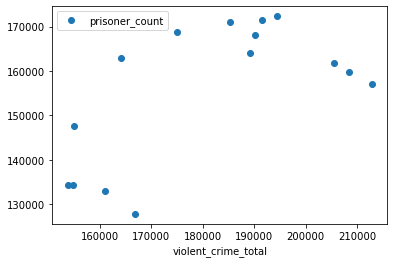

In [38]:
df_state.plot(x = 'violent_crime_total', y = 'prisoner_count', style = 'o')

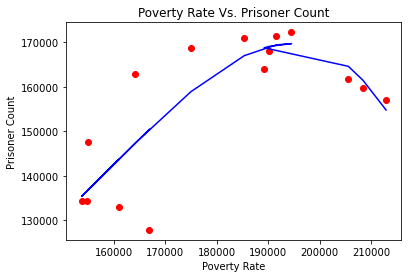

Best Degree: 0
RMSE: 8729.551890167531


In [39]:
# Polynomial regression more closely models real world data than linear regression

# not splitting into training and test set because we only have 15 data points

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degrees = np.arange(1,10) # array of degree values to try (we want to determine degree with lowest error)

min_rmse = 1e10 # intialize to really large number
best_deg = 0 


X = df_state['violent_crime_total'].values.reshape(-1,1)
Y = df_state['prisoner_count'].values.reshape(-1,1)

for deg in degrees:
    poly_reg = PolynomialFeatures(degree = deg)
    X_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # fit must be included in a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y)
    Y_poly_predict = lin_reg.predict(X_poly)
    
    # calculating rmse
    rmse = np.sqrt(mean_squared_error(Y, Y_poly_predict))
    
    # Seeing current degree gives a smaller error
    if min_rmse > rmse:
        min_rmse = rmse
        min_deg = deg

# Plotting polynomial regression for the best degree
best_poly_reg = PolynomialFeatures(degree = best_deg)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
Y_poly_predict = lin_reg.predict(X_poly)

plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X.reshape(-1,1))), color='blue')
plt.title('Poverty Rate Vs. Prisoner Count')
plt.xlabel('Poverty Rate')
plt.ylabel('Prisoner Count')
plt.show()

print('Best Degree:', best_deg)
print('RMSE:', min_rmse)
        



<AxesSubplot:xlabel='poverty_rate'>

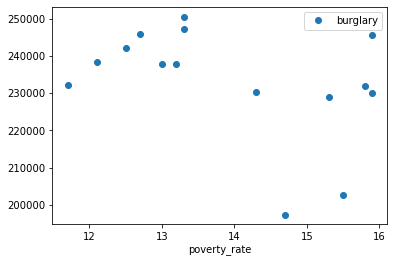

In [40]:
df_state.plot(x = 'poverty_rate', y = 'burglary', style = 'o')

In [41]:
#Calculting Thresholds for prisoner count across states

min_wt = min(df_copy['prisoner_count'])
max_wt = max(df_copy['prisoner_count'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df_copy['prisoner_count'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['prisoner_count'] and row['prisoner_count'] <= bin1_end:
        return 'low'
    elif row['prisoner_count'] <= bin2_end:
        return 'medium'
    else:
        return 'high'
    
df_copy['count_categ'] = df_copy.apply(lambda row: label_wt(row),axis=1)
print("Thresholds: \nBin 1 = ",bin1_end,"\nBin 2 = ",bin2_end,"\nBin 3 = ",max_wt,"\nSize of each bin = ",per_bin)

Thresholds: 
Bin 1 =  58158.0 
Bin 2 =  115228.0 
Bin 3 =  172298 
Size of each bin =  57070.0


In [42]:
df_copy.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate,count_categ
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7,low
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7,low
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7,low
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7,low
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7,high


<AxesSubplot:xlabel='count_categ'>

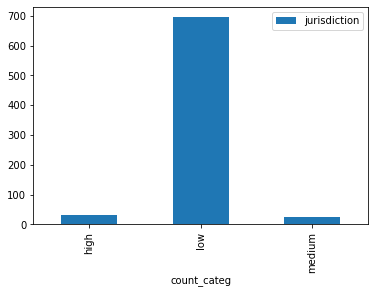

In [43]:
df_copy.groupby('count_categ').count().reset_index().plot.bar(x='count_categ',y='jurisdiction')

In [44]:
#Encoding jurisdiction column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_copy['jurisdiction'] = LE.fit_transform(df_copy['jurisdiction'])
df_copy

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate,count_categ
1,0,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7,low
2,1,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7,low
3,2,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7,low
4,3,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7,low
5,4,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,45,False,2015,30430,False,False,8382993.0,16399.0,383.0,1493.0,4441.0,9235.0,156470.0,21340.0,127019.0,8111.0,14.7,low
761,46,False,2015,17222,False,False,7170351.0,20394.0,211.0,2193.0,5449.0,12029.0,248369.0,50993.0,170509.0,26867.0,14.7,low
762,47,False,2015,5925,False,False,1844128.0,6231.0,70.0,420.0,760.0,4729.0,37251.0,9170.0,25842.0,2239.0,14.7,low
763,48,False,2015,22914,False,False,5771337.0,17647.0,240.0,1224.0,5232.0,10395.0,113924.0,19554.0,83385.0,10985.0,14.7,low


The user can choose which year they want to evaluate the data from 2001-2015.

For the example below, we let year = 2001.

In [45]:
# Choosing year: 
year = 2001
df_year = df_copy.groupby(['year']).get_group(year)
df_year

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,poverty_rate,count_categ
1,0,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,11.7,low
2,1,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,11.7,low
3,2,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,11.7,low
4,3,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,11.7,low
5,4,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,11.7,high
6,5,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0,11.7,low
7,6,True,2001,17507,False,False,3434602.0,11492.0,105.0,639.0,4183.0,6565.0,95299.0,17159.0,65762.0,12378.0,11.7,low
8,7,True,2001,6841,False,False,796599.0,4868.0,23.0,420.0,1156.0,3269.0,27399.0,5144.0,19476.0,2779.0,11.7,low
9,8,False,2001,72404,False,False,16373330.0,130713.0,874.0,6641.0,32867.0,90331.0,782517.0,176052.0,516548.0,89917.0,11.7,medium
10,9,False,2001,45937,False,False,8405677.0,41671.0,598.0,2180.0,14402.0,24491.0,347872.0,71799.0,238484.0,37589.0,11.7,low


We use KMeans clustering to group states by population, prisoner count, total violent crime, and poverty rate in order to understand how states compare by these features.

In [46]:
#Using KMeans to group states by high, medium, low population for chosen year
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df_population = pd.DataFrame(df_year, columns = ['jurisdiction', 'state_population'])
kmeans = KMeans(n_clusters = 3).fit(df_population)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.46666667e+01 3.50226736e+06]
 [4.00000000e+00 3.46004630e+07]
 [2.64285714e+01 1.47211493e+07]]


In [47]:
y_km = kmeans.fit_predict(df_population)
print(y_km)

[0 0 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 2 0 0 0 0 2 0 0 0 0 0 0 0]


For the prisoner count, since the values are so large, we need to pick at least 4 clusters for KMeans to divide the data properly.

In [48]:
#Using KMeans to group states by prisoner_count by year
df_prisoner_count = pd.DataFrame(df_year, columns = ['jurisdiction', 'prisoner_count'])
kmeans = KMeans(n_clusters = 4).fit(df_prisoner_count)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.91666667e+01 5.39933333e+04]
 [2.56111111e+01 2.32361667e+04]
 [2.30000000e+01 1.52811000e+05]
 [2.51250000e+01 5.50504167e+03]]


In [49]:
y_km = kmeans.fit_predict(df_prisoner_count)
print(y_km)

[3 0 3 0 1 3 3 0 2 2 0 0 2 3 0 0 0 3 0 3 0 2 0 3 3 0 0 0 0 3 0 2 3 0 2 3 0
 2 0 3 0 3 1 0 0 3 3 0 3 0]


In [50]:
#Using KMeans to group states by high, medium, low total violent crime
df_crime_total = pd.DataFrame(df_year, columns = ['jurisdiction', 'violent_crime_total'])
kmeans = KMeans(n_clusters = 3).fit(df_crime_total)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.51250000e+01 8.99253125e+03]
 [2.12500000e+01 1.40939250e+05]
 [2.40000000e+01 4.13405000e+04]]


In [51]:
y_km = kmeans.fit_predict(df_crime_total)
print(y_km)

[1 1 0 1 2 1 1 1 2 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 2 0 1 0 1 1
 0 1 0 1 0 2 1 1 1 1 1 1 1]


In [52]:
#Using KMeans to group states by high, medium, low poverty rate
df_poverty_rate = pd.DataFrame(df_year, columns = ['jurisdiction', 'poverty_rate'])
kmeans = KMeans(n_clusters = 3).fit(df_poverty_rate)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 8.5 11.7]
 [41.5 11.7]
 [25.5 11.7]]


In [53]:
y_km = kmeans.fit_predict(df_poverty_rate)
print(y_km)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [54]:
df_burglary_prisoner_count = pd.DataFrame(df_year, columns = ['burglary', 'prisoner_count'])
kmeans = KMeans(n_clusters = 3).fit(df_burglary_prisoner_count)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 58860.94444444  32078.11111111]
 [204229.         126008.66666667]
 [ 15151.65517241   7742.13793103]]


In [55]:
y_km = kmeans.fit_predict(df_burglary_prisoner_count)
print(y_km)

[2 0 2 0 1 0 0 0 1 2 0 0 2 2 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0
 2 0 2 0 2 1 0 0 2 2 0 0 0]


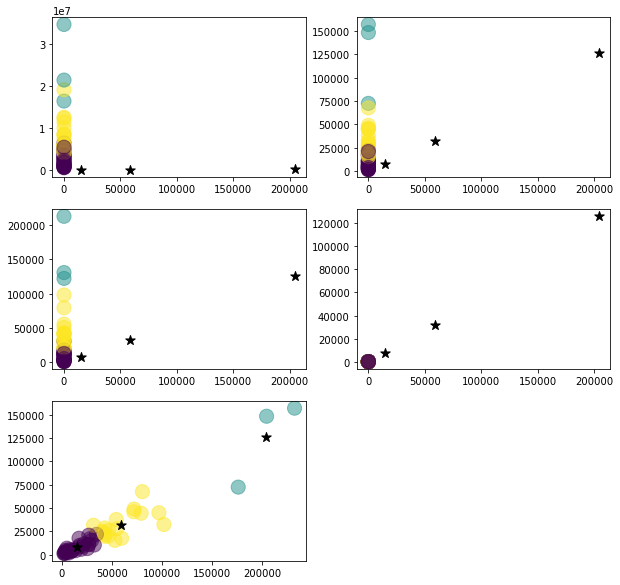

In [56]:
#Subplot of all KMeans Plots
plt.figure(figsize = (10,10))
plt.subplot(3, 2, 1)
plt.scatter(df_population.jurisdiction, df_population.state_population, c = kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)
plt.subplot(3, 2, 2)
plt.scatter(df_prisoner_count.jurisdiction, df_prisoner_count.prisoner_count, c = kmeans.labels_.astype(float), s=200, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)
plt.subplot(3, 2, 3)
plt.scatter(df_crime_total.jurisdiction, df_crime_total.violent_crime_total, c = kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)
plt.subplot(3,2,4)
plt.scatter(df_poverty_rate.jurisdiction, df_poverty_rate.poverty_rate, c = kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)
plt.subplot(3,2,5)
plt.scatter(df_burglary_prisoner_count.burglary, df_burglary_prisoner_count.prisoner_count, c = kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)
plt.show()

Next, we do a 3D KMeans cluster plot, to evaluate the correlation between burglary, violent_crime_total, and prisoner_count.

In [57]:
#3D KMeans plot
from mpl_toolkits.mplot3d import Axes3D
df_3d = pd.DataFrame(df_year, columns = ['burglary', 'violent_crime_total', 'prisoner_count'])
kmeans = KMeans(n_clusters = 3).fit(df_3d)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 62966.2         44497.46666667  33436.46666667]
 [ 17325.0625       9284.           9386.90625   ]
 [204229.         155245.         126008.66666667]]


In [58]:
y_km = kmeans.fit_predict(df_3d)
print(y_km)

[0 0 2 0 1 0 0 0 1 2 0 0 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0
 2 0 2 0 2 1 0 0 0 2 0 0 0]


NameError: name 'y' is not defined

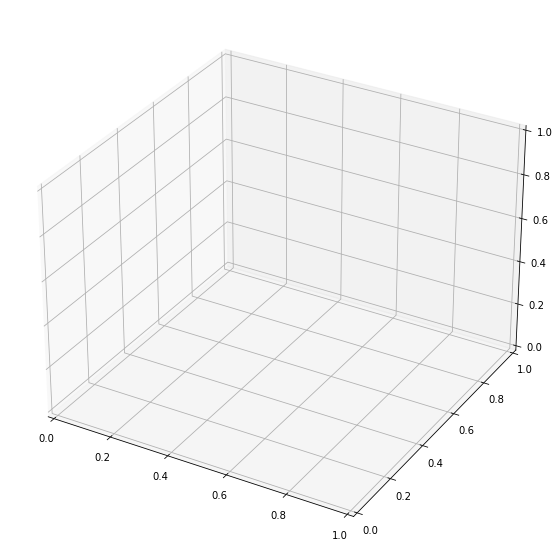

In [59]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = '3d')
ax.scatter(df_3d.burglary, df_3d.violent_crime_total, df_3d.prisoner_count, c=y, cmap='Set2', s=50)
ax.set_xlabel('burglary')
ax.set_ylabel('violent crime total')
ax.set_zlabel('prisoner count')
#Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c='black', s=100)